In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split

In [4]:
df=pandas.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
X = df.values[:,:-1]
y = df.values[:,-1]
print('X',X.shape)

X (1599, 11)


In [8]:
model = PCA()
model.fit(X)
XX = model.transform(X)

In [10]:
print(np.round(model.explained_variance_ratio_,3))
print(np.round(np.cumsum(model.explained_variance_ratio_),3))

[0.947 0.048 0.003 0.002 0.001 0.    0.    0.    0.    0.    0.   ]
[0.947 0.995 0.998 0.999 1.    1.    1.    1.    1.    1.    1.   ]


In [12]:
print(np.unique(y))

[3. 4. 5. 6. 7. 8.]


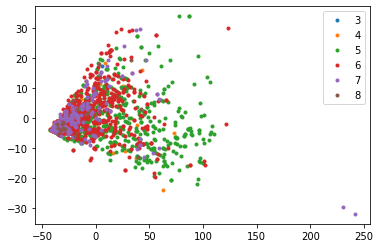

In [15]:
plt.figure()
plt.plot(XX[y==3,0],XX[y==3,1],'.',label=3)
plt.plot(XX[y==4,0],XX[y==4,1],'.',label=4)
plt.plot(XX[y==5,0],XX[y==5,1],'.',label=5)
plt.plot(XX[y==6,0],XX[y==6,1],'.',label=6)
plt.plot(XX[y==7,0],XX[y==7,1],'.',label=7)
plt.plot(XX[y==8,0],XX[y==8,1],'.',label=8)
plt.legend()
plt.show()

In [16]:
print('XX',XX.shape)
XX = XX[:,:2]
print('XX',XX.shape)

XX (1599, 11)
XX (1599, 2)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(XX,y,test_size=0.3)

model = SVR()
model.fit(X_train,y_train)
ypred = model.predict(X_test)
print('MAE',mean_absolute_error(y_test,ypred))

MAE 0.5826152440508632
